In [656]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Final Data Cleaning

In [657]:
# Import dataset called final_data.xlsx
df = pd.read_excel('final_data.xlsx')
df.head()

,ZIP,County,RUCC_2013,total_population,age_0_20_rate,age_21_29_rate,age_30_39_rate,age_40_49_rate,age_50_64_rate,age_65_more_rate,...,Number_of_Charging_Stations_per_EV,Traffic_Count,Most_Common_Charging_Facility_Type,Total_Hospitals,Total_Hospital_Beds,Total_Hotel_Airbnb,Number_of_Offices,Airport_Count,three_year_precipitation_avg,three_year_temp_avg
0,75001,Dallas,1,16633,0.138640,0.250887,0.231949,0.147658,0.139482,0.091385,...,0.061538,55449621,BANK,1.000000,32.000000,2424,280034,5,3.540000,66.463889
1,75002,Collin,1,72679,0.305783,0.105051,0.101996,0.165151,0.213459,0.108560,...,0.001705,14578185,UNKNOWN,2.181818,248.363636,530,113507,4,3.622857,65.302778
2,75006,Dallas,1,48062,0.257834,0.141068,0.157401,0.133036,0.172943,0.137718,...,0.019774,55449621,UNKNOWN,1.000000,22.000000,2424,280034,5,3.540000,66.463889
3,75007,Denton,1,54498,0.214485,0.120793,0.153437,0.142189,0.233660,0.135436,...,0.000000,9547675,UNKNOWN,1.461538,119.615385,952,71664,7,3.464286,65.438889
4,75009,Collin,1,28109,0.334768,0.065531,0.173468,0.146430,0.146786,0.133018,...,0.006623,14578185,UNKNOWN,2.181818,248.363636,530,113507,4,3.622857,65.302778


In [658]:
# Create dummy variables for Most_Common_Charging_Facility_Type
df = pd.get_dummies(df, columns=['Most_Common_Charging_Facility_Type'])
# Replace True with 1 and False with 0
df = df.replace(True, 1)
df = df.replace(False, 0)
df.head()

,ZIP,County,RUCC_2013,total_population,age_0_20_rate,age_21_29_rate,age_30_39_rate,age_40_49_rate,age_50_64_rate,age_65_more_rate,...,Most_Common_Charging_Facility_Type_REC_SPORTS_FACILITY,Most_Common_Charging_Facility_Type_RESTAURANT,Most_Common_Charging_Facility_Type_RETAIL,Most_Common_Charging_Facility_Type_SCHOOL,Most_Common_Charging_Facility_Type_SHOPPING_CENTER,Most_Common_Charging_Facility_Type_SHOPPING_MALL,Most_Common_Charging_Facility_Type_TRAVEL_CENTER,Most_Common_Charging_Facility_Type_TRUCK_STOP,Most_Common_Charging_Facility_Type_UNKNOWN,Most_Common_Charging_Facility_Type_UTILITY
0,75001,Dallas,1,16633,0.138640,0.250887,0.231949,0.147658,0.139482,0.091385,...,0,0,0,0,0,0,0,0,0,0
1,75002,Collin,1,72679,0.305783,0.105051,0.101996,0.165151,0.213459,0.108560,...,0,0,0,0,0,0,0,0,1,0
2,75006,Dallas,1,48062,0.257834,0.141068,0.157401,0.133036,0.172943,0.137718,...,0,0,0,0,0,0,0,0,1,0
3,75007,Denton,1,54498,0.214485,0.120793,0.153437,0.142189,0.233660,0.135436,...,0,0,0,0,0,0,0,0,1,0
4,75009,Collin,1,28109,0.334768,0.065531,0.173468,0.146430,0.146786,0.133018,...,0,0,0,0,0,0,0,0,1,0


In [659]:
# Drop the 'Most_Common_Charging_Facility_Type_UNKNOWN' since it doesn't provide any information
df = df.drop(columns=['Most_Common_Charging_Facility_Type_UNKNOWN'])

In [660]:
# List all the columns in the dataset
df.columns

Index(['ZIP', 'County', 'RUCC_2013', 'total_population', 'age_0_20_rate',
       'age_21_29_rate', 'age_30_39_rate', 'age_40_49_rate', 'age_50_64_rate',
       'age_65_more_rate', 'ethnicity_wnh_rate', 'transport_car_rate',
       'transport_public_rate', 'transport_others_rate', 'wfh_rate',
       'persons_per_household', 'ever_married_rate', 'average_traveltime_work',
       'household_income_median', 'individual_income_percapita',
       'unemployment_rate', 'college_educ_rate', 'Total_EV',
       'EV_adoption_rate', 'CNG_stations', 'LPG_stations', 'E85_stations',
       'BD_stations', 'ELEC_stations', 'LNG_stations', 'public_stations',
       'private_stations', 'Total_EV_Level1_EVSE', 'Total_EV_Level2_EVSE',
       'Total_EV_DC_Fast_Count', 'Total_EV_Chargers',
       'Number_of_Charging_Stations_per_EV', 'Traffic_Count',
       'Total_Hospitals', 'Total_Hospital_Beds', 'Total_Hotel_Airbnb',
       'Number_of_Offices', 'Airport_Count', 'three_year_precipitation_avg',
       'three

In [661]:
# Get value distribution of the target variables EV_adoption_rate
df['EV_adoption_rate'].value_counts()

EV_adoption_rate
0.000000    434
0.005025      3
0.004717      2
0.002146      2
0.002560      2
           ... 
0.001856      1
0.001410      1
0.000977      1
0.000851      1
0.004872      1
Name: count, Length: 1513, dtype: int64

In [662]:
# If total_population is bigger than 1 standrd deviation from the mean but EV_adoption_rate is 0, 
# then we fill the EV_adoption_rate with the mean value of EV_adoption_rate in the County
df['EV_adoption_rate'] = np.where((df['EV_adoption_rate'] == 0) & (df['total_population'] > df['total_population'].quantile(0.1587)), df.groupby('County')['EV_adoption_rate'].transform('mean'), df['EV_adoption_rate'])

In [663]:
# Get value distribution of the target variables EV_adoption_rate
df['EV_adoption_rate'].value_counts()

EV_adoption_rate
0.000000    293
0.001352      4
0.000154      3
0.002581      3
0.001573      3
           ... 
0.002093      1
0.001006      1
0.000818      1
0.000951      1
0.004872      1
Name: count, Length: 1607, dtype: int64

In [664]:
# Get the value distribution of the target variable Total_EV_Chargers
df['Total_EV_Chargers'].value_counts()

Total_EV_Chargers
0      1301
2       104
4        64
8        44
1        38
       ... 
36        1
35        1
125       1
124       1
132       1
Name: count, Length: 70, dtype: int64

In [665]:
# If population is bigger than 1 standrd deviation from the mean, 
# then we fill the Total_EV_Chargers with the mean value of Total_EV_Chargers in the County
df['Total_EV_Chargers'] = np.where((df['total_population'] > df['total_population'].quantile(0.1587)) & (df['Total_EV_Chargers'] == 0), df.groupby('County')['Total_EV_Chargers'].transform('mean'), df['Total_EV_Chargers'])

In [666]:
# Get the value distribution of the target variable Total_EV_Chargers
df['Total_EV_Chargers'].value_counts()

Total_EV_Chargers
0.0      594
2.0      112
1.0       75
4.0       65
8.0       44
        ... 
125.0      1
81.0       1
98.0       1
36.0       1
112.0      1
Name: count, Length: 158, dtype: int64

In [667]:
# Recalculate EV_adoption_rate by dividing Total_EV by total_population
df['EV_adoption_rate'] = df['Total_EV'] / df['total_population']

In [668]:
# Recalculate Number_of_Charging_Stations_per_EV by dividing Total_EV_Chargers by Total_EV
df['Number_of_Charging_Stations_per_EV'] = df['Total_EV_Chargers'] / df['Total_EV']

In [669]:
# Replace any infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isnull().any()

ZIP                                                   False
County                                                False
RUCC_2013                                             False
total_population                                      False
age_0_20_rate                                         False
                                                      ...  
Most_Common_Charging_Facility_Type_SHOPPING_CENTER    False
Most_Common_Charging_Facility_Type_SHOPPING_MALL      False
Most_Common_Charging_Facility_Type_TRAVEL_CENTER      False
Most_Common_Charging_Facility_Type_TRUCK_STOP         False
Most_Common_Charging_Facility_Type_UTILITY            False
Length: 85, dtype: bool

In [670]:
# Show columns with NaN values
mask = df.isnull().any()
df.columns[mask]

Index(['EV_adoption_rate', 'Number_of_Charging_Stations_per_EV'], dtype='object')

In [671]:
# Replace NaN values with 0, since these nulls are resulted from infinite values
# There was either 0 of EVs or 0 population for the EV_adoption_rate calculation
# And there was either 0 of EVs or 0 of charging stations for the Number_of_Charging_Stations_per_EV calculation
df.fillna(0, inplace=True)

# EV-Aoption EDA

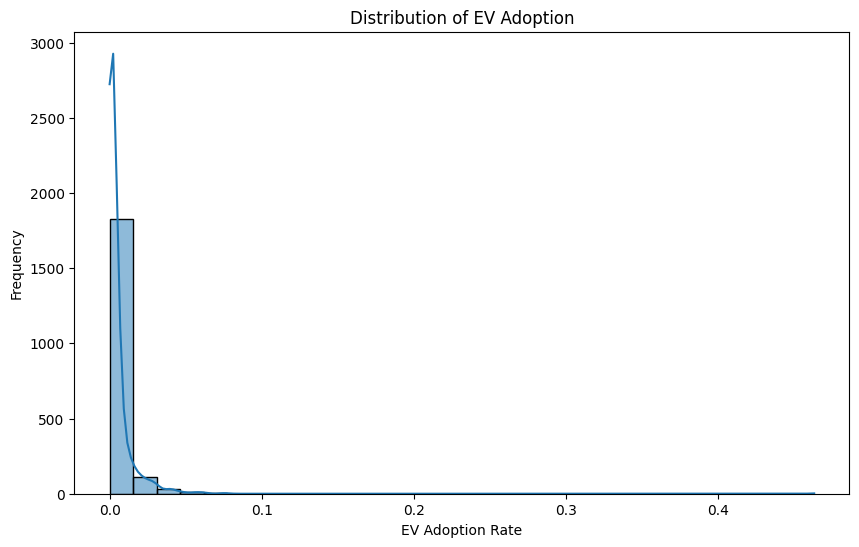

In [672]:
# Analyzing the distribution of the EV_Adoption variable
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot of EV_Adoption
plt.figure(figsize=(10, 6))
sns.histplot(df['EV_adoption_rate'], bins=30, kde=True)
plt.title('Distribution of EV Adoption')
plt.xlabel('EV Adoption Rate')
plt.ylabel('Frequency')
plt.show()

We can see the target variable is very skewed, therefore we can try doing a log transformation when modeling to see if it helps.

# EV-Aoption Linear Regression

In [673]:
X = df.drop('EV_adoption_rate', axis=1)
y = df['EV_adoption_rate']

In [674]:
from sklearn.model_selection import train_test_split
# Calculate the R-squared value
from sklearn.metrics import r2_score
# Calculate the MSE value
from sklearn.metrics import mean_squared_error
# For linear regression with easy interpretation
from statsmodels.api import OLS

Random state with the highest R-squared value: 801
Highest R-squared value: 0.7619200201011965


In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=801)
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# For X_train and X_test, we don't want to include ZIP and County as predicting variables
X_train = X_train.drop(['ZIP', 'County'], axis=1)
X_test = X_test.drop(['ZIP', 'County'], axis=1)
# Drop variables that can cause data leakage problems
X_train = X_train.drop(['Total_EV', 'total_population'], axis=1)
X_test = X_test.drop(['Total_EV', 'total_population'], axis=1)

# Perform log transformation on the target variable and the predicting variables
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Fit using all variable without feature selection
model = OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       EV_adoption_rate   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              31.77
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                   8.90e-260
Time:                        02:07:55   Log-Likelihood:                          5343.0
No. Observations:                1584   AIC:                                 -1.053e+04
Df Residuals:                    1507   BIC:                                 -1.012e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
                                                                   coef    std err          t      P>|t|      [0.025    

In [676]:
# Use the model on the test data
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.7619200201011965
MSE: 0.003760082828130933


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

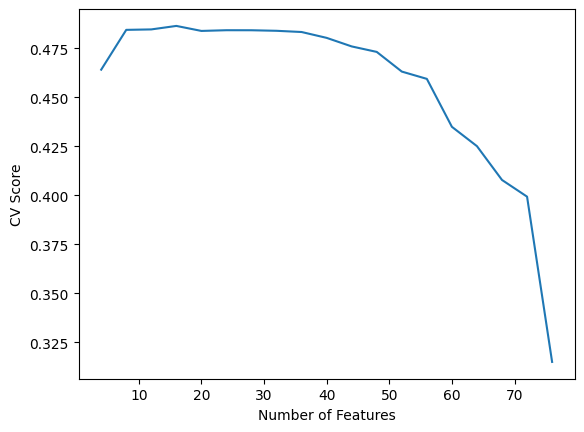

In [677]:
# We will use wrapper method (SFS) along with the Linear Regression model to select the best features
from sklearn.feature_selection import SequentialFeatureSelector
# Create a new scikit-learn linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(n_jobs=-1)

# # We will find the best amount of features to select based on the CV score
from sklearn.model_selection import cross_val_score
# List to store cross-validation scores
cv_scores = []

# Number of features to select in intervals of 5
num_features = np.arange(4, len(X_train.columns), 4)
for n in num_features:
    sfs = SequentialFeatureSelector(linear_model, n_features_to_select=n, direction='forward', n_jobs=-1)
    sfs.fit(X_train, y_train)
    #.transform(X_train) will return the selected features
    X_train_sfs = sfs.transform(X_train)
    # Use cross_val_score to get the CV score
    score = cross_val_score(linear_model, X_train_sfs, y_train, cv=10, scoring='r2').mean()
    cv_scores.append(score)

# Plot CV scores
plt.plot(num_features, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('CV Score')
plt.show()

In [678]:
# Select the number of features that gives the highest CV score
optimal_num_features = num_features[np.argmax(cv_scores)]
print('Optimal number of features for linear regression:', optimal_num_features)
print('CV score:', cv_scores[np.argmax(cv_scores)])

Optimal number of features for linear regression: 16
CV score: 0.4863166204841824


In [679]:
# Create a Sequential Feature Selector object with the optimal number of features
sfs = SequentialFeatureSelector(linear_model, n_features_to_select=optimal_num_features, direction='forward', n_jobs=-1)

# Fit the SFS object to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfs.get_support()]

# Print the selected features
print(selected_features)

Index(['RUCC_2013', 'transport_car_rate', 'wfh_rate', 'persons_per_household',
       'household_income_median', 'individual_income_percapita',
       'LPG_stations', 'Total_EV_Chargers', 'Total_Hotel_Airbnb',
       'three_year_precipitation_avg',
       'Most_Common_Charging_Facility_Type_CAR_DEALER',
       'Most_Common_Charging_Facility_Type_HOSPITAL',
       'Most_Common_Charging_Facility_Type_MUNI_GOV',
       'Most_Common_Charging_Facility_Type_OFFICE_BLDG',
       'Most_Common_Charging_Facility_Type_PARKING_GARAGE',
       'Most_Common_Charging_Facility_Type_RESTAURANT'],
      dtype='object')


In [680]:
# Run the linear regression model with the selected features and get summary statistics
X_train_sfs = sfs.transform(X_train)
X_train_sfs = pd.DataFrame(X_train_sfs, columns=selected_features)
# Reset the index of the y_train dataframe
y_train = y_train.reset_index(drop=True)
model = OLS(y_train, X_train_sfs).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       EV_adoption_rate   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              56.58
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                   2.25e-142
Time:                        02:12:44   Log-Likelihood:                          4940.1
No. Observations:                1584   AIC:                                     -9848.
Df Residuals:                    1568   BIC:                                     -9762.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

In [794]:
# Store the model summary in a dataframe
model_summary = model.summary()
model_as_html = model_summary.tables[1].as_html()
model_df = pd.read_html(model_as_html, header=0, index_col=0)[0]
model_df

/var/folders/03/7tjd273d5v3c9w_mbksz2h8r0000gn/T/ipykernel_91462/3942722488.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  model_df = pd.read_html(model_as_html, header=0, index_col=0)[0]


,coef,std err,t,P>|t|,[0.025,0.975]
RUCC_2013,-3.000000e-04,0.000000e+00,-2.284,0.022,-0.000000e+00,-3.700000e-05
transport_car_rate,-5.600000e-03,3.000000e-03,-1.919,0.055,-1.100000e-02,0.000000e+00
wfh_rate,2.670000e-02,8.000000e-03,3.296,0.001,1.100000e-02,4.300000e-02
persons_per_household,-7.000000e-04,0.000000e+00,-1.581,0.114,-2.000000e-03,0.000000e+00
household_income_median,5.988000e-08,1.410000e-08,4.250,0.000,3.220000e-08,8.750000e-08
individual_income_percapita,1.192000e-07,2.920000e-08,4.082,0.000,6.190000e-08,1.760000e-07
LPG_stations,-1.000000e-03,1.000000e-03,-1.088,0.277,-3.000000e-03,1.000000e-03
Total_EV_Chargers,2.000000e-04,2.520000e-05,9.125,0.000,0.000000e+00,0.000000e+00
Total_Hotel_Airbnb,8.789000e-07,3.120000e-07,2.815,0.005,2.660000e-07,1.490000e-06
three_year_precipitation_avg,-3.000000e-04,0.000000e+00,-1.604,0.109,-1.000000e-03,7.350000e-05


In [800]:
# Filter to include only the significant variables and sort by coefficient
significant_variables = model_df[model_df['P>|t|'] <= 0.05]
significant_variables = significant_variables.sort_values('coef', ascending=False)
significant_variables

,coef,std err,t,P>|t|,[0.025,0.975]
wfh_rate,2.670000e-02,8.000000e-03,3.296,0.001,1.100000e-02,4.300000e-02
Total_EV_Chargers,2.000000e-04,2.520000e-05,9.125,0.000,0.000000e+00,0.000000e+00
Total_Hotel_Airbnb,8.789000e-07,3.120000e-07,2.815,0.005,2.660000e-07,1.490000e-06
individual_income_percapita,1.192000e-07,2.920000e-08,4.082,0.000,6.190000e-08,1.760000e-07
household_income_median,5.988000e-08,1.410000e-08,4.250,0.000,3.220000e-08,8.750000e-08
RUCC_2013,-3.000000e-04,0.000000e+00,-2.284,0.022,-0.000000e+00,-3.700000e-05


In [681]:
# Use the model to predict the EV adoption rate for the test data
X_test_sfs = sfs.transform(X_test)
X_test_sfs = pd.DataFrame(X_test_sfs, columns=selected_features)
y_pred = model.predict(X_test_sfs)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

R-squared value: 0.7321320282984156
Mean squared error: 1.5907163157698485e-05


# EV-Aoption Random Forest Model

Number of features currently on: 8
Number of features currently on: 16
Number of features currently on: 24
Number of features currently on: 32
Number of features currently on: 40
Number of features currently on: 48
Number of features currently on: 56
Number of features currently on: 64
Number of features currently on: 72


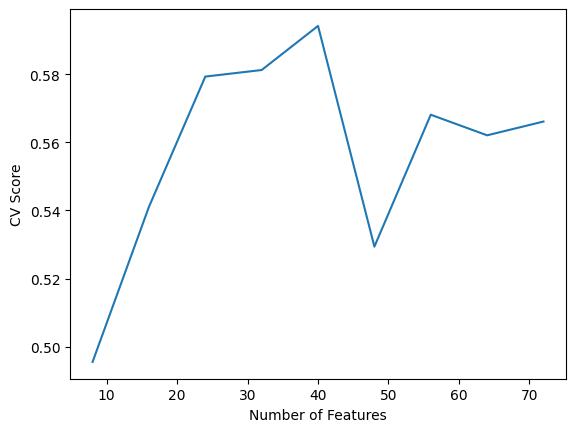

In [682]:
# Select features using SFS and Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_jobs=-1)

# List to store cross-validation scores
cv_scores_rf = []

# Number of features to select in intervals of 10
num_features = np.arange(8, len(X_train.columns), 8)

for n in num_features:
    sfs = SequentialFeatureSelector(rf_model, n_features_to_select=n, direction='forward', n_jobs=-1)
    sfs.fit(X_train, y_train)
    #.transform(X_train) will return the selected features
    X_train_sfs = sfs.transform(X_train)
    score = cross_val_score(rf_model, X_train_sfs, y_train, cv=10, scoring = 'r2').mean()
    cv_scores_rf.append(score)
    print('Number of features currently on:', n)

# Plot CV scores
plt.plot(num_features, cv_scores_rf)
plt.xlabel('Number of Features')

plt.ylabel('CV Score')
plt.show()

In [683]:
# Select the number of features that gives the highest CV score
optimal_num_features_rf = num_features[np.argmax(cv_scores_rf)]
print('Optimal number of features for random forest:', optimal_num_features_rf)
print('CV score:', cv_scores_rf[np.argmax(cv_scores_rf)])

Optimal number of features for random forest: 40
CV score: 0.5942108029867018


In [684]:
# Create a Sequential Feature Selector object with the optimal number of features
sfs = SequentialFeatureSelector(rf_model, n_features_to_select=optimal_num_features_rf, direction='forward', n_jobs=-1)

# Fit the SFS object to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features_rf = X_train.columns[sfs.get_support()]

# Print the selected features
print(selected_features_rf)

Index(['RUCC_2013', 'age_21_29_rate', 'age_30_39_rate', 'age_40_49_rate',
       'age_50_64_rate', 'age_65_more_rate', 'ethnicity_wnh_rate',
       'transport_car_rate', 'transport_others_rate', 'wfh_rate',
       'ever_married_rate', 'individual_income_percapita', 'CNG_stations',
       'LPG_stations', 'BD_stations', 'LNG_stations', 'private_stations',
       'Total_EV_DC_Fast_Count', 'Traffic_Count', 'Total_Hospital_Beds',
       'Total_Hotel_Airbnb', 'Number_of_Offices',
       'Most_Common_Charging_Facility_Type_AUTO_REPAIR',
       'Most_Common_Charging_Facility_Type_BANK',
       'Most_Common_Charging_Facility_Type_B_AND_B',
       'Most_Common_Charging_Facility_Type_CAMPGROUND',
       'Most_Common_Charging_Facility_Type_COLLEGE_CAMPUS',
       'Most_Common_Charging_Facility_Type_FIRE_STATION',
       'Most_Common_Charging_Facility_Type_FUEL_RESELLER',
       'Most_Common_Charging_Facility_Type_HARDWARE_STORE',
       'Most_Common_Charging_Facility_Type_INN',
       'Most_Common

In [685]:
# We create a new random forest model with the selected features
X_train_sfs = sfs.transform(X_train)
X_train_sfs = pd.DataFrame(X_train_sfs, columns=selected_features_rf)
rf_model = RandomForestRegressor()
rf_model.fit(X_train_sfs, y_train)

# We check the r-squared value of the model for the training data
r2_train = rf_model.score(X_train_sfs, y_train)
print('R-squared value for training data:', r2_train)

R-squared value for training data: 0.8884544338686554


In [686]:
# We use the model to predict the EV adoption rate for the test data
X_test_sfs = sfs.transform(X_test)
X_test_sfs = pd.DataFrame(X_test_sfs, columns=selected_features_rf)
y_pred_rf = rf_model.predict(X_test_sfs)

# We calculate the r-squared value
r2_rf = r2_score(y_test, y_pred_rf)
print('R-squared value:', r2_rf)

# We calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean squared error:', mse_rf)

R-squared value: 0.7320791027235155
Mean squared error: 1.5910306108122166e-05


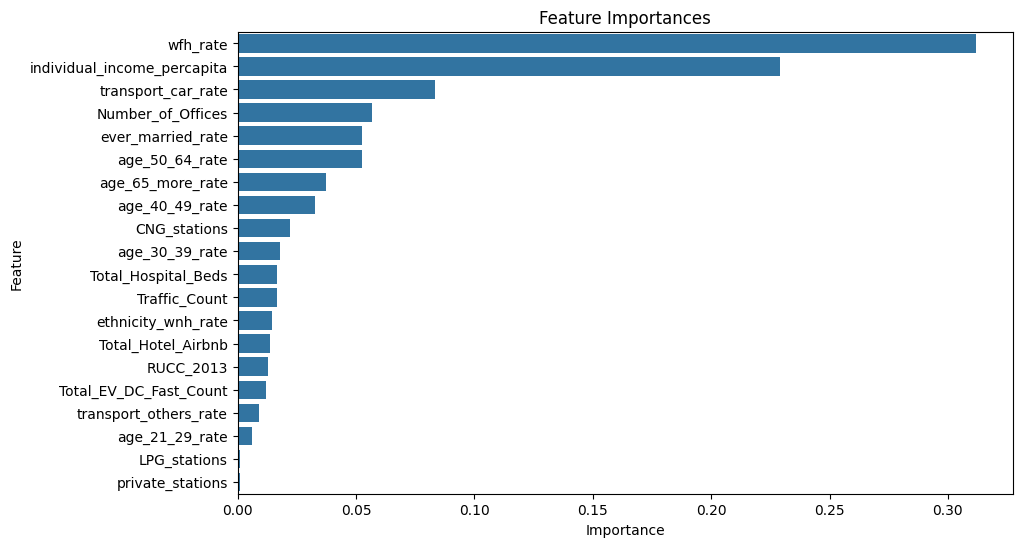

In [687]:
# Visualize the random forest model feature importance
# The rf_model.feature_importances_ attribute in a Random Forest model provides the feature importances computed 
# as the mean and standard deviation of accumulation of the impurity decrease within each tree.
# Get the feature importances
importances = rf_model.feature_importances_
# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
# Make the indicies of the top 20 features
indices = indices[:20]
# Get the feature names
features = X_train_sfs.columns
# Plot the top 20 feature importances with horizontal bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [819]:
# Create a new dataframe with the feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': selected_features_rf, 'Importance': importances})
# Sort the dataframe by importance and keep the top 20 features
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances_top20 = feature_importances.head(20)
feature_importances_top20

,Feature,Importance
9,wfh_rate,0.311768
11,individual_income_percapita,0.229281
7,transport_car_rate,0.083196
21,Number_of_Offices,0.056799
10,ever_married_rate,0.052396
4,age_50_64_rate,0.052394
5,age_65_more_rate,0.037126
3,age_40_49_rate,0.032798
12,CNG_stations,0.022293
2,age_30_39_rate,0.017957


In [820]:
# Find overlapping features between model_df and feature_importances_top20
overlapping_features_cs = model_df.index.intersection(feature_importances_top20['Feature'])
overlapping_features_cs

Index(['RUCC_2013', 'transport_car_rate', 'wfh_rate',
       'individual_income_percapita', 'LPG_stations', 'Total_Hotel_Airbnb'],
      dtype='object')

# EV-Aoption Model Evaluation

In [688]:
# Compare the two models
print('Linear Regression R-squared:', r2)
print('Random Forest R-squared:', r2_rf)

print('Linear Regression MSE:', mse)
print('Random Forest MSE:', mse_rf)

Linear Regression R-squared: 0.7321320282984156
Random Forest R-squared: 0.7320791027235155
Linear Regression MSE: 1.5907163157698485e-05
Random Forest MSE: 1.5910306108122166e-05


# Number of Charging Stations EDA

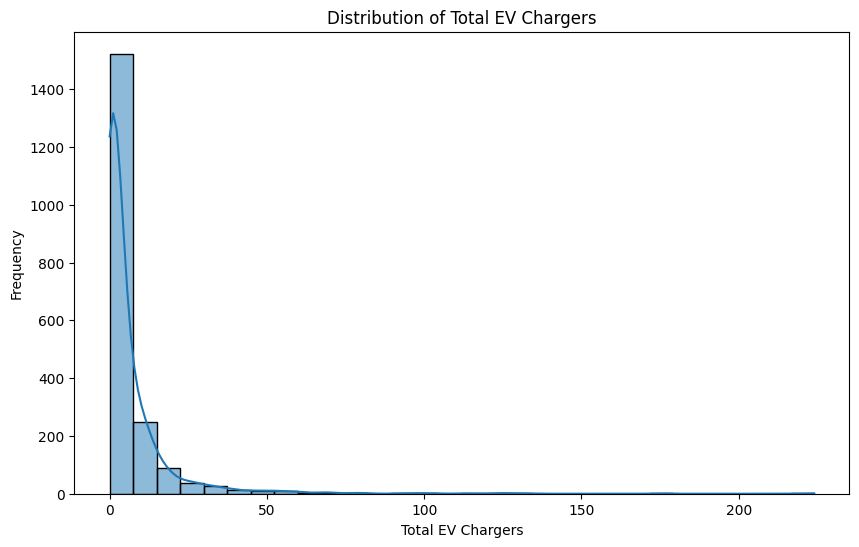

In [689]:
# Analyzing the distribution of the Total_EV_Chargers variable
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot of Total_EV_Chargers
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_EV_Chargers'], bins=30, kde=True)
plt.title('Distribution of Total EV Chargers')
plt.xlabel('Total EV Chargers')
plt.ylabel('Frequency')
plt.show()

We can see the target variable is very skewed, therefore we can try doing a log transformation when modeling to see if it helps.

# Number of Charging Stations Linear Regression

In [690]:
X = df.drop('Total_EV_Chargers', axis=1)
y = df['Total_EV_Chargers']

In [691]:
from sklearn.model_selection import train_test_split
# Calculate the R-squared value
from sklearn.metrics import r2_score
# Calculate the MSE value
from sklearn.metrics import mean_squared_error
# For linear regression with easy interpretation
from statsmodels.api import OLS

Random state with the highest R-squared value: 664
Highest R-squared value: 0.7184803988376247


In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=664)
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# For X_train and X_test, we don't want to include ZIP and County as predicting variables
X_train = X_train.drop(['ZIP', 'County'], axis=1)
X_test = X_test.drop(['ZIP', 'County'], axis=1)

# Drop variables that can cause data leakage problems
X_train = X_train.drop(['CNG_stations', 'LPG_stations', 'E85_stations', 'BD_stations', 'ELEC_stations', 'LNG_stations', 'public_stations', 'private_stations', 'Total_EV_Level1_EVSE', 'Total_EV_Level2_EVSE', 'Total_EV_DC_Fast_Count', 'Number_of_Charging_Stations_per_EV'], axis=1)
X_test = X_test.drop(['CNG_stations', 'LPG_stations', 'E85_stations', 'BD_stations', 'ELEC_stations', 'LNG_stations', 'public_stations', 'private_stations', 'Total_EV_Level1_EVSE', 'Total_EV_Level2_EVSE', 'Total_EV_DC_Fast_Count', 'Number_of_Charging_Stations_per_EV'], axis=1)

# Perform log transformation on the target variable and the predicting variables
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Fit using all variable without feature selection
cs_model = OLS(y_train, X_train).fit()
print(cs_model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Total_EV_Chargers   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              125.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        06:32:59   Log-Likelihood:                         -1523.9
No. Observations:                1584   AIC:                                      3186.
Df Residuals:                    1515   BIC:                                      3556.
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
                                                                   coef    std err          t      P>|t|      [0.025    

In [693]:
# Use the model on the test data
y_pred = cs_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.7184803988376247
MSE: 0.6210476466625502


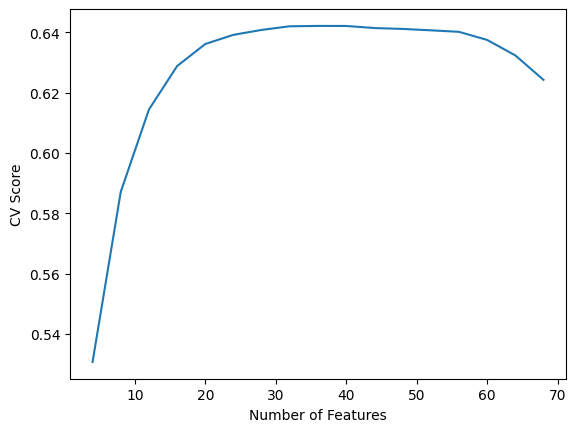

In [694]:
# We will use wrapper method (SFS) along with the Linear Regression model to select the best features
from sklearn.feature_selection import SequentialFeatureSelector
# Create a new scikit-learn linear regression model
from sklearn.linear_model import LinearRegression
cs_linear_model = LinearRegression(n_jobs=-1)

# # We will find the best amount of features to select based on the CV score
from sklearn.model_selection import cross_val_score
# List to store cross-validation scores
cv_scores = []

# Number of features to select in intervals of 5
num_features = np.arange(4, len(X_train.columns), 4)
for n in num_features:
    sfs = SequentialFeatureSelector(cs_linear_model, n_features_to_select=n, direction='forward', n_jobs=-1)
    sfs.fit(X_train, y_train)
    #.transform(X_train) will return the selected features
    X_train_sfs = sfs.transform(X_train)
    # Use cross_val_score to get the CV score
    score = cross_val_score(cs_linear_model, X_train_sfs, y_train, cv=10, scoring='r2').mean()
    cv_scores.append(score)

# Plot CV scores
plt.plot(num_features, cv_scores)
plt.xlabel('Number of Features')
plt.ylabel('CV Score')
plt.show()

In [695]:
# Select the number of features that gives the highest CV score
optimal_num_features = num_features[np.argmax(cv_scores)]
print('Optimal number of features for linear regression:', optimal_num_features)
print('CV score:', cv_scores[np.argmax(cv_scores)])

Optimal number of features for linear regression: 36
CV score: 0.6421478385971752


In [696]:
# Create a Sequential Feature Selector object with the optimal number of features
sfs = SequentialFeatureSelector(linear_model, n_features_to_select=optimal_num_features, direction='forward', n_jobs=-1)

# Fit the SFS object to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features_cs = X_train.columns[sfs.get_support()]

# Print the selected features
print(selected_features_cs)

Index(['RUCC_2013', 'total_population', 'age_0_20_rate', 'age_21_29_rate',
       'age_30_39_rate', 'age_50_64_rate', 'age_65_more_rate',
       'ethnicity_wnh_rate', 'transport_public_rate',
       'average_traveltime_work', 'individual_income_percapita', 'Total_EV',
       'Traffic_Count', 'Total_Hotel_Airbnb', 'three_year_precipitation_avg',
       'three_year_temp_avg', 'Most_Common_Charging_Facility_Type_AIRPORT',
       'Most_Common_Charging_Facility_Type_BREWERY_DISTILLERY_WINERY',
       'Most_Common_Charging_Facility_Type_B_AND_B',
       'Most_Common_Charging_Facility_Type_CAR_DEALER',
       'Most_Common_Charging_Facility_Type_FED_GOV',
       'Most_Common_Charging_Facility_Type_GAS_STATION',
       'Most_Common_Charging_Facility_Type_GROCERY',
       'Most_Common_Charging_Facility_Type_HOSPITAL',
       'Most_Common_Charging_Facility_Type_HOTEL',
       'Most_Common_Charging_Facility_Type_MUNI_GOV',
       'Most_Common_Charging_Facility_Type_OFFICE_BLDG',
       'Most_Commo

In [697]:
# Run the linear regression model with the selected features and get summary statistics
X_train_sfs = sfs.transform(X_train)
X_train_sfs = pd.DataFrame(X_train_sfs, columns=selected_features_cs)
# Reset the index of the y_train dataframe
y_train = y_train.reset_index(drop=True)
cs_model = OLS(y_train, X_train_sfs).fit()
print(cs_model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Total_EV_Chargers   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              232.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        06:36:34   Log-Likelihood:                         -1560.9
No. Observations:                1584   AIC:                                      3194.
Df Residuals:                    1548   BIC:                                      3387.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                                                                   coef    std err          t      P>|t|      [0.025    

In [797]:
# Store the model summary in a dataframe
cs_model_summary = cs_model.summary()
cs_model_as_html = cs_model_summary.tables[1].as_html()
cs_model_df = pd.read_html(cs_model_as_html, header=0, index_col=0)[0]
cs_model_df

/var/folders/03/7tjd273d5v3c9w_mbksz2h8r0000gn/T/ipykernel_91462/823898273.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cs_model_df = pd.read_html(cs_model_as_html, header=0, index_col=0)[0]


,coef,std err,t,P>|t|,[0.025,0.975]
RUCC_2013,-8.790000e-02,9.000000e-03,-10.145,0.000,-1.050000e-01,-7.100000e-02
total_population,6.179000e-06,1.420000e-06,4.342,0.000,3.390000e-06,8.970000e-06
age_0_20_rate,7.304000e-01,1.830000e-01,3.982,0.000,3.710000e-01,1.090000e+00
age_21_29_rate,1.868000e+00,2.680000e-01,6.974,0.000,1.343000e+00,2.393000e+00
age_30_39_rate,1.313500e+00,3.360000e-01,3.913,0.000,6.550000e-01,1.972000e+00
age_50_64_rate,2.491000e-01,2.440000e-01,1.019,0.308,-2.300000e-01,7.290000e-01
age_65_more_rate,4.669000e-01,2.120000e-01,2.197,0.028,5.000000e-02,8.840000e-01
ethnicity_wnh_rate,-3.099000e-01,9.200000e-02,-3.362,0.001,-4.910000e-01,-1.290000e-01
transport_public_rate,1.181300e+01,2.656000e+00,4.447,0.000,6.603000e+00,1.702300e+01
average_traveltime_work,5.400000e-03,3.000000e-03,1.765,0.078,-1.000000e-03,1.100000e-02


In [799]:
# Filter to include only the significant variables and sort by coefficient
cs_significant_variables = cs_model_df[cs_model_df['P>|t|'] <= 0.05]
cs_significant_variables = cs_significant_variables.sort_values('coef', ascending=False)
cs_significant_variables

,coef,std err,t,P>|t|,[0.025,0.975]
transport_public_rate,1.181300e+01,2.656000e+00,4.447,0.000,6.603000e+00,1.702300e+01
Most_Common_Charging_Facility_Type_TRAVEL_CENTER,1.949900e+00,3.290000e-01,5.921,0.000,1.304000e+00,2.596000e+00
age_21_29_rate,1.868000e+00,2.680000e-01,6.974,0.000,1.343000e+00,2.393000e+00
Most_Common_Charging_Facility_Type_PAY_GARAGE,1.836900e+00,6.580000e-01,2.790,0.005,5.460000e-01,3.128000e+00
Most_Common_Charging_Facility_Type_PUBLIC,1.827400e+00,4.650000e-01,3.928,0.000,9.150000e-01,2.740000e+00
Most_Common_Charging_Facility_Type_AIRPORT,1.806100e+00,5.170000e-01,3.494,0.000,7.920000e-01,2.820000e+00
Most_Common_Charging_Facility_Type_GROCERY,1.679800e+00,4.660000e-01,3.603,0.000,7.650000e-01,2.594000e+00
Most_Common_Charging_Facility_Type_GAS_STATION,1.500900e+00,1.390000e-01,10.777,0.000,1.228000e+00,1.774000e+00
age_30_39_rate,1.313500e+00,3.360000e-01,3.913,0.000,6.550000e-01,1.972000e+00
Most_Common_Charging_Facility_Type_OTHER,8.589000e-01,1.510000e-01,5.704,0.000,5.640000e-01,1.154000e+00


In [698]:
# Use the model to predict the EV adoption rate for the test data
X_test_sfs = sfs.transform(X_test)
X_test_sfs = pd.DataFrame(X_test_sfs, columns=selected_features_cs)
y_pred = cs_model.predict(X_test_sfs)

# Calculate the R-squared value
r2_cs = r2_score(y_test, y_pred)
print('R-squared value:', r2)

# Calculate the mean squared error
mse_cs = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

R-squared value: 0.7184803988376247
Mean squared error: 0.6210476466625502


# Number of Charging Stations Random Forest Model

Number of features currently on: 8
Number of features currently on: 16
Number of features currently on: 24
Number of features currently on: 32
Number of features currently on: 40
Number of features currently on: 48
Number of features currently on: 56
Number of features currently on: 64


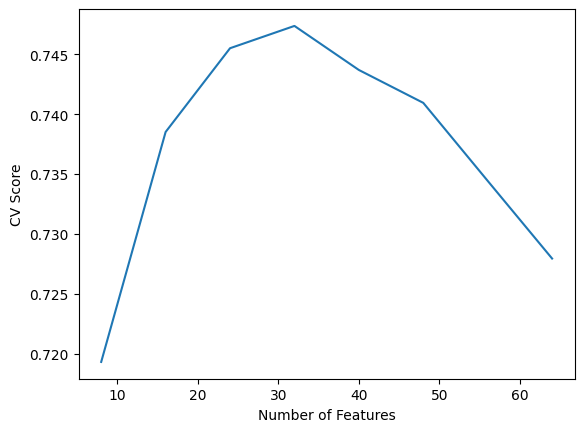

In [699]:
# Select features using SFS and Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
cs_rf_model = RandomForestRegressor(n_jobs=-1)

# List to store cross-validation scores
cv_scores_rf = []

# Number of features to select in intervals of 10
num_features = np.arange(8, len(X_train.columns), 8)

for n in num_features:
    sfs = SequentialFeatureSelector(cs_rf_model, n_features_to_select=n, direction='forward', n_jobs=-1)
    sfs.fit(X_train, y_train)
    #.transform(X_train) will return the selected features
    X_train_sfs = sfs.transform(X_train)
    score = cross_val_score(cs_rf_model, X_train_sfs, y_train, cv=10, scoring = 'r2').mean()
    cv_scores_rf.append(score)
    print('Number of features currently on:', n)

# Plot CV scores
plt.plot(num_features, cv_scores_rf)
plt.xlabel('Number of Features')

plt.ylabel('CV Score')
plt.show()

In [700]:
# Select the number of features that gives the highest CV score
optimal_num_features_rf = num_features[np.argmax(cv_scores_rf)]
print('Optimal number of features for random forest:', optimal_num_features_rf)
print('CV score:', cv_scores_rf[np.argmax(cv_scores_rf)])

Optimal number of features for random forest: 32
CV score: 0.7473783162206403


In [701]:
# Create a Sequential Feature Selector object with the optimal number of features
sfs = SequentialFeatureSelector(cs_rf_model, n_features_to_select=optimal_num_features_rf, direction='forward', n_jobs=-1)

# Fit the SFS object to the training data
sfs.fit(X_train, y_train)

# Get the selected features
selected_features_rf_cs = X_train.columns[sfs.get_support()]

# Print the selected features
print(selected_features_rf_cs)

Index(['RUCC_2013', 'total_population', 'age_21_29_rate', 'Total_EV',
       'EV_adoption_rate', 'Total_Hospital_Beds', 'Total_Hotel_Airbnb',
       'Number_of_Offices', 'Airport_Count', 'three_year_precipitation_avg',
       'three_year_temp_avg', 'Most_Common_Charging_Facility_Type_AIRPORT',
       'Most_Common_Charging_Facility_Type_B_AND_B',
       'Most_Common_Charging_Facility_Type_CAMPGROUND',
       'Most_Common_Charging_Facility_Type_CARWASH',
       'Most_Common_Charging_Facility_Type_CAR_DEALER',
       'Most_Common_Charging_Facility_Type_COLLEGE_CAMPUS',
       'Most_Common_Charging_Facility_Type_CONVENIENCE_STORE',
       'Most_Common_Charging_Facility_Type_FUEL_RESELLER',
       'Most_Common_Charging_Facility_Type_GAS_STATION',
       'Most_Common_Charging_Facility_Type_GROCERY',
       'Most_Common_Charging_Facility_Type_HARDWARE_STORE',
       'Most_Common_Charging_Facility_Type_HOSPITAL',
       'Most_Common_Charging_Facility_Type_HOTEL',
       'Most_Common_Charging_F

In [702]:
# We create a new random forest model with the selected features
X_train_sfs = sfs.transform(X_train)
X_train_sfs = pd.DataFrame(X_train_sfs, columns=selected_features_rf_cs)
cs_rf_model = RandomForestRegressor()
cs_rf_model.fit(X_train_sfs, y_train)

# We check the r-squared value of the model for the training data
r2_train = cs_rf_model.score(X_train_sfs, y_train)
print('R-squared value for training data:', r2_train)

R-squared value for training data: 0.965354169571537


In [703]:
# We use the model to predict the EV adoption rate for the test data
X_test_sfs = sfs.transform(X_test)
X_test_sfs = pd.DataFrame(X_test_sfs, columns=selected_features_rf_cs)
y_pred_rf = cs_rf_model.predict(X_test_sfs)

# We calculate the r-squared value
r2_rf_cs = r2_score(y_test, y_pred_rf)
print('R-squared value:', r2_rf_cs)

# We calculate the mean squared error
mse_rf_cs = mean_squared_error(y_test, y_pred_rf)
print('Mean squared error:', mse_rf_cs)

R-squared value: 0.805391260372181
Mean squared error: 0.2666266415632181


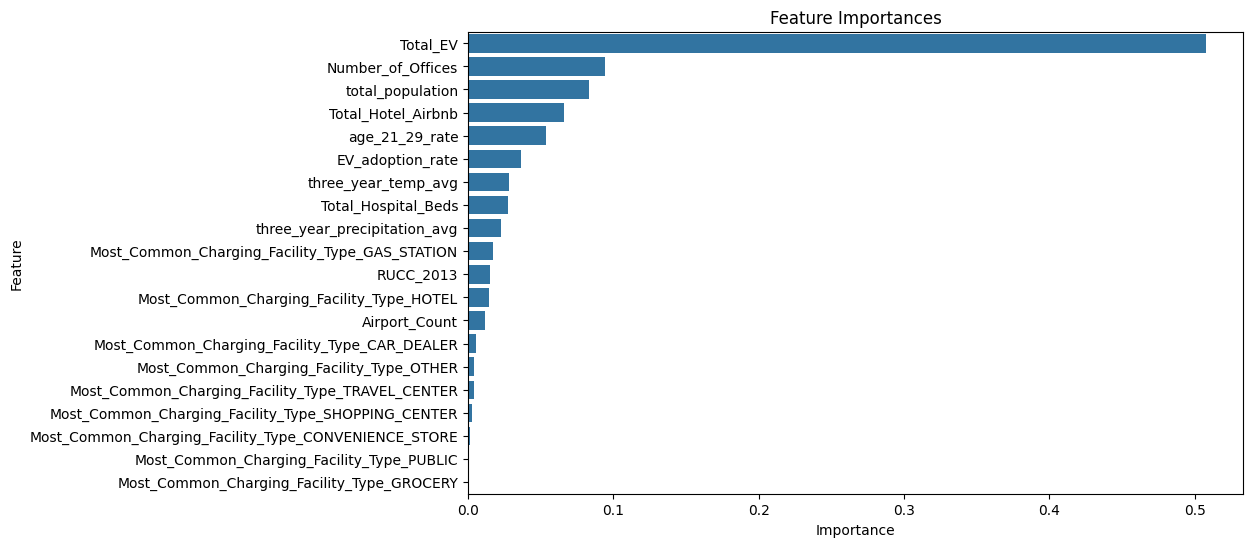

In [704]:
# Visualize the random forest model feature importance
# The rf_model.feature_importances_ attribute in a Random Forest model provides the feature importances computed 
# as the mean and standard deviation of accumulation of the impurity decrease within each tree.
# Get the feature importances
importances = cs_rf_model.feature_importances_
# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
# Make the indicies of the top 20 features
indices = indices[:20]
# Get the feature names
features = X_train_sfs.columns
# Plot the top 20 feature importances with horizontal bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [821]:
# Store the feature importances in a dataframe
importances_cs = cs_rf_model.feature_importances_
feature_importances_cs = pd.DataFrame({'Feature': selected_features_rf_cs, 'Importance': importances_cs})
# Sort the feature importances by importance and keep on the top 20 features
feature_importances_top20_cs = feature_importances_cs.sort_values('Importance', ascending=False).head(20)
feature_importances_top20_cs

,Feature,Importance
3,Total_EV,0.507943
7,Number_of_Offices,0.094480
1,total_population,0.083234
6,Total_Hotel_Airbnb,0.065911
2,age_21_29_rate,0.053787
4,EV_adoption_rate,0.036395
10,three_year_temp_avg,0.028097
5,Total_Hospital_Beds,0.027800
9,three_year_precipitation_avg,0.022675
19,Most_Common_Charging_Facility_Type_GAS_STATION,0.017092


In [822]:
# Find overlapping features between cs_model_df and feature_importances_top15
overlapping_features_cs = cs_model_df.index.intersection(feature_importances_top20_cs['Feature'])
overlapping_features_cs

Index(['RUCC_2013', 'total_population', 'age_21_29_rate', 'Total_EV',
       'Total_Hotel_Airbnb', 'three_year_precipitation_avg',
       'three_year_temp_avg', 'Most_Common_Charging_Facility_Type_CAR_DEALER',
       'Most_Common_Charging_Facility_Type_GAS_STATION',
       'Most_Common_Charging_Facility_Type_GROCERY',
       'Most_Common_Charging_Facility_Type_HOTEL',
       'Most_Common_Charging_Facility_Type_OTHER',
       'Most_Common_Charging_Facility_Type_PUBLIC',
       'Most_Common_Charging_Facility_Type_SHOPPING_CENTER',
       'Most_Common_Charging_Facility_Type_TRAVEL_CENTER'],
      dtype='object')

# Number of Charging Stations Model Evaluation

In [705]:
# Compare the two models
print('Linear Regression R-squared:', r2_cs)
print('Random Forest R-squared:', r2_rf_cs)

print('Linear Regression MSE:', mse_cs)
print('Random Forest MSE:', mse_rf_cs)

Linear Regression R-squared: 0.7113895729276218
Random Forest R-squared: 0.805391260372181
Linear Regression MSE: 0.39541507250702224
Random Forest MSE: 0.2666266415632181


# Number of Charging Stations Analysis

In [706]:
# Drop ZIP and County but store them in separate variables for later use
ZIP = X['ZIP']
County = X['County']
X = X.drop(['ZIP', 'County'], axis=1)
# Fit using the previous random forest model with the selected features on all the data
X = X.drop(['CNG_stations', 'LPG_stations', 'E85_stations', 'BD_stations', 'ELEC_stations', 'LNG_stations', 'public_stations', 'private_stations', 'Total_EV_Level1_EVSE', 'Total_EV_Level2_EVSE', 'Total_EV_DC_Fast_Count', 'Number_of_Charging_Stations_per_EV'], axis=1)
X_sfs = sfs.transform(X)
X_sfs = pd.DataFrame(X_sfs, columns=selected_features_rf_cs)
y = np.log1p(y)
cs_rf_model_final = RandomForestRegressor()
cs_rf_model_final.fit(X_sfs, y)

RandomForestRegressor()

In [707]:
# Find the top 100 predicted - acutal values using the previous random forest model
predictions = cs_rf_model_final.predict(X_sfs)
predictions = np.expm1(predictions)
actual = np.expm1(y)

# Create a dataframe with the actual and predicted values
cs_predictions = pd.DataFrame({'Actual': actual, 'Predicted': predictions})
# Add back the ZIP and County columns
cs_predictions['ZIP'] = ZIP
cs_predictions['County'] = County
cs_predictions

,Actual,Predicted,ZIP,County
0,16.000000,18.313200,75001,Dallas
1,2.000000,4.999374,75002,Collin
2,7.000000,7.698519,75006,Dallas
3,13.413793,12.303075,75007,Denton
4,5.000000,5.335881,75009,Collin
...,...,...,...,...
1975,4.000000,3.620595,79935,El Paso
1976,10.000000,10.667238,79936,El Paso
1977,3.727273,5.889215,79938,El Paso
1978,0.000000,0.000000,79952,El Paso


In [708]:
# Sort the dataframe by the difference between the actual and predicted values
cs_predictions['Difference'] = cs_predictions['Predicted'] - cs_predictions['Actual']
cs_predictions = cs_predictions.sort_values('Difference', ascending=False)
cs_predictions

,Actual,Predicted,ZIP,County,Difference
126,5.0,12.989960,75206,Dallas,7.989960
1580,3.0,10.086093,78731,Travis,7.086093
1598,9.0,15.738084,78751,Travis,6.738084
1350,23.0,28.936352,78256,Bexar,5.936352
824,8.0,13.935825,77006,Harris,5.935825
...,...,...,...,...,...
517,98.0,48.397104,76155,Tarrant,-49.602896
13,124.0,72.970064,75024,Collin,-51.029936
1605,132.0,72.532007,78758,Travis,-59.467993
820,175.0,99.555888,77002,Harris,-75.444112


In [709]:
# Get the top 100 ZIP codes with the highest difference between the actual and predicted values while showing the Difference column
top_100_zip = cs_predictions.head(100)
top_100_zip = top_100_zip.loc[:, ['ZIP', 'Difference']]
# Round to the nearest whole number
top_100_zip['Difference'] = top_100_zip['Difference'].round(0)
top_100_zip

,ZIP,Difference
126,75206,8.0
1580,78731,7.0
1598,78751,7.0
1350,78256,6.0
824,77006,6.0
...,...,...
425,76008,1.0
862,77044,1.0
11,75022,1.0
1152,77833,1.0


In [759]:
# Get the top 10 ZIP
top_10_zip = top_100_zip.head(10)
top_10_zip

,ZIP,Difference
126,75206,8.0
1580,78731,7.0
1598,78751,7.0
1350,78256,6.0
824,77006,6.0
821,77003,5.0
14,75025,5.0
169,75251,5.0
995,77407,4.0
23,75039,4.0


# Marginal Analysis

In [839]:
# Prepare the data for running random forest model on the EV adoption rate iteratively for marginal analysis
# We want to see how adding one more charging station iteratively will affect the EV adoption rate
# So for example, if we have ZIP 75080, 75081, 75082, we run a rf model with 1 additional charging station to each ZIP one at a time
# If the rf models shows adding one more charging station to ZIP 75080 will increase the EV adoption rate the most, 
# then we add the first charging station there while remaining ZIPs will have 0 additional charging stations
# We run the rf models again, adding each ZIP one charging station at a time and see which ZIP will have the highest increase in EV adoption rate
# If the ZIP 75080 still has the highest increase in EV adoption rate, then we add the second charging station there while the rest will have 0 additional charging stations
# We keep doing this until we reach the maximum number of charging stations we can add

def train_rf_model_adjusted(X, y):
    """
    Train a Random Forest model on the given dataset.

    Parameters:
    - X: Features DataFrame
    - y: Target variable Series (EV_adoption_rate)

    Returns:
    - The trained Random Forest model
    """

    # Store the ZIP and County columns for later use
    ZIP = X['ZIP']
    County = X['County']
    # Drop ZIP and County columns since they are not the factors we want to look at 
    X = X.drop(['ZIP', 'County'], axis=1)
    # Include only variables selected by the feature selection process for the EV adoption rate random forest model
    X = X[selected_features_rf]

    # Initialize and train the Random Forest model
    ma_rf_model = RandomForestRegressor(n_jobs=-1)
    ma_rf_model.fit(X, y)

    # Get the prediction for the y values
    predictions = ma_rf_model.predict(X)
    # Put ZIP and County into the predictions
    predictions = np.expm1(predictions)
    actual = np.expm1(y)
    predictions_df = pd.DataFrame({'Actual': actual, 'Predicted': predictions})
    predictions_df['ZIP'] = ZIP
    predictions_df['County'] = County
    predictions_df['Difference'] = predictions_df['Predicted'] - predictions_df['Actual']

    return model, predictions_df


def marginal_analysis_adjusted(df_ma, zip_codes, max_stations):
    """
    Determines the optimal allocation of charging stations across different ZIP codes to maximize EV adoption rate.

    Parameters:
    - df.ma: DataFrame containing the dataset
    - zip_codes: List of ZIP codes to consider for adding charging stations
    - max_stations: The maximum number of charging stations that can be added

    Returns:
    - A summary of the analysis, indicating which ZIP codes should be prioritized, 
    how many charging stations should be added to each ZIP code, 
    and the expected increase in EV adoption rate.
    """
    results = pd.DataFrame(columns=['ZIP', 'Additional_Charging_Stations', 'Increase_in_EV_Adoption_Rate'])
    for _ in range(max_stations):
        print("On iteration", _ + 1)
        best_increase = 0
        best_zip = None
        for zip_code in zip_codes:
            # Copy the DataFrame to avoid altering the original data
            temp_df = df_ma.copy()

            # Simulate adding one charging station to the current ZIP code
            temp_df.loc[temp_df['ZIP'] == zip_code, 'Total_EV_Chargers'] += 1
            # Also need to add one to Total_EV_DC_Fast_Count
            temp_df.loc[temp_df['ZIP'] == zip_code, 'Total_EV_DC_Fast_Count'] += 1

            # Drop target variables
            X = temp_df.drop(['EV_adoption_rate'], axis=1) # Adjusted as per the dataset
            # Drop variables that can cause data leakage problems
            X = X.drop(['Total_EV', 'total_population'], axis=1)
            y = temp_df['EV_adoption_rate']

            # Train the model and get prediction for that ZIP code
            _, predictions_df = train_rf_model_adjusted(X, y)

            # Look increase in EV adoption rate for this ZIP code by looking at the difference column
            increase = predictions_df.loc[predictions_df['ZIP'] == zip_code, 'Difference'].values[0]
            
            # Check if this is the best result so far
            if increase > best_increase:
                best_increase = increase
                best_zip = zip_code

        # Update the DataFrame with the best result for this iteration
        df_ma.loc[df['ZIP'] == best_zip, 'Total_EV_Chargers'] += 1
        df_ma.loc[df['ZIP'] == best_zip, 'Total_EV_DC_Fast_Count'] += 1
        # If the it is the first time adding the charging station, we add the ZIP to the results dataframe,
        # we set the Additional_Charging_Stations column to 1, and we set the Increase_in_EV_Adoption_Rate column to the best_increase
        # If the ZIP is already in the results dataframe, we increment the Additional_Charging_Stations column by 1 and we add to the previous Increase_in_EV_Adoption_Rate the best_increase
        if best_zip not in results['ZIP'].values:
            new_row = pd.DataFrame({'ZIP': [best_zip], 'County': [df_ma.loc[df_ma['ZIP'] == best_zip, 'County'].values[0]], 'Additional_Charging_Stations': [1], 'Increase_in_EV_Adoption_Rate': [best_increase]})
            results = pd.concat([results, new_row], ignore_index=True)
        else:
            results.loc[results['ZIP'] == best_zip, 'Additional_Charging_Stations'] += 1
            results.loc[results['ZIP'] == best_zip, 'Increase_in_EV_Adoption_Rate'] += best_increase
    return results

In [840]:
df_ma = df.copy()
final_solution_Q2 = marginal_analysis_adjusted(df_ma, top_100_zip['ZIP'].values, 100)
final_solution_Q2

On iteration 1


/var/folders/03/7tjd273d5v3c9w_mbksz2h8r0000gn/T/ipykernel_91462/3551426889.py:100: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


On iteration 2
On iteration 3
On iteration 4
On iteration 5
On iteration 6
On iteration 7
On iteration 8
On iteration 9
On iteration 10
On iteration 11
On iteration 12
On iteration 13
On iteration 14
On iteration 15
On iteration 16
On iteration 17
On iteration 18
On iteration 19
On iteration 20
On iteration 21
On iteration 22
On iteration 23
On iteration 24
On iteration 25
On iteration 26
On iteration 27
On iteration 28
On iteration 29
On iteration 30
On iteration 31
On iteration 32
On iteration 33
On iteration 34
On iteration 35
On iteration 36
On iteration 37
On iteration 38
On iteration 39
On iteration 40
On iteration 41
On iteration 42
On iteration 43
On iteration 44
On iteration 45
On iteration 46
On iteration 47
On iteration 48
On iteration 49
On iteration 50
On iteration 51
On iteration 52
On iteration 53
On iteration 54
On iteration 55
On iteration 56
On iteration 57
On iteration 58
On iteration 59
On iteration 60
On iteration 61
On iteration 62
On iteration 63
On iteration 64


,ZIP,Additional_Charging_Stations,Increase_in_EV_Adoption_Rate,County
0,75206,9,0.043054,Dallas
1,77046,67,0.388480,Harris
2,75022,3,0.019884,Denton
3,76049,3,0.017848,Hood
4,77407,7,0.063810,Fort Bend
5,78751,10,0.049241,Travis
6,75056,1,0.004556,Denton


In [841]:
# Reorder final_solution_Q2 based on ZIP
final_solution_Q2 = final_solution_Q2.sort_values('ZIP')
# Reorder to make County after ZIP
final_solution_Q2 = final_solution_Q2[['ZIP', 'County', 'Additional_Charging_Stations', 'Increase_in_EV_Adoption_Rate']]
# Sort by additional charging stations in descending order
final_solution_Q2 = final_solution_Q2.sort_values('Additional_Charging_Stations', ascending=False)
final_solution_Q2                                     

,ZIP,County,Additional_Charging_Stations,Increase_in_EV_Adoption_Rate
1,77046,Harris,67,0.388480
5,78751,Travis,10,0.049241
0,75206,Dallas,9,0.043054
4,77407,Fort Bend,7,0.063810
2,75022,Denton,3,0.019884
3,76049,Hood,3,0.017848
6,75056,Denton,1,0.004556


In [842]:
# See how many charging stations are in each of the ZIP codes of the result dataframe
# Create a mask to only show the ZIP codes that are in the final_solution_Q2 dataframe
mask = df['ZIP'].isin(final_solution_Q2['ZIP'].values)
temp = pd.DataFrame()
# Append the ZIP to temp 
temp['ZIP'] = df[mask]['ZIP'].values
# Append current number to the final_solution_Q2 dataframe
temp['Current_Number_of_Charging_Stations'] = df[mask]['Total_EV_Chargers'].values
#Append Number_of_Charging_Stations_per_EV to the final_solution_Q2 dataframe
temp['Number_of_Charging_Stations_per_EV'] = df[mask]['Number_of_Charging_Stations_per_EV'].values
# Append RUCC_2013 to the final_solution_Q2 dataframe
temp['RUCC_2013'] = df[mask]['RUCC_2013'].values
# Add in the total population column
temp['total_population'] = df[mask]['total_population'].values
# Sort the temp based on ZIP
temp = temp.sort_values('ZIP')
# Join the two dataframes using the ZIP column
final_solution_Q2_merged = final_solution_Q2.merge(temp, on='ZIP')
final_solution_Q2_merged

,ZIP,County,Additional_Charging_Stations,Increase_in_EV_Adoption_Rate,Current_Number_of_Charging_Stations,Number_of_Charging_Stations_per_EV,RUCC_2013,total_population
0,77046,Harris,67,0.388480,10.0,0.416667,1,1254
1,78751,Travis,10,0.049241,9.0,0.027108,1,16326
2,75206,Dallas,9,0.043054,5.0,0.006849,1,38432
3,77407,Fort Bend,7,0.063810,10.0,0.006667,1,76600
4,75022,Denton,3,0.019884,1.0,0.001081,1,27000
5,76049,Hood,3,0.017848,3.0,0.015789,1,29301
6,75056,Denton,1,0.004556,21.0,0.014037,1,65785


In [843]:
# Add a new column called the number of cars added due to the increase in EV adoption rate
final_solution_Q2_merged['Number_of_EVs_Added'] = final_solution_Q2_merged['Increase_in_EV_Adoption_Rate'] * final_solution_Q2_merged['total_population']
# Reorder to be after increase in EV adoption rate
final_solution_Q2_merged = final_solution_Q2_merged[['ZIP', 'County', 'Current_Number_of_Charging_Stations', 'Additional_Charging_Stations', 'Increase_in_EV_Adoption_Rate', 'Number_of_EVs_Added', 'Number_of_Charging_Stations_per_EV', 'RUCC_2013']]
final_solution_Q2_merged

,ZIP,County,Current_Number_of_Charging_Stations,Additional_Charging_Stations,Increase_in_EV_Adoption_Rate,Number_of_EVs_Added,Number_of_Charging_Stations_per_EV,RUCC_2013
0,77046,Harris,10.0,67,0.388480,487.153747,0.416667,1
1,78751,Travis,9.0,10,0.049241,803.910575,0.027108,1
2,75206,Dallas,5.0,9,0.043054,1654.636864,0.006849,1
3,77407,Fort Bend,10.0,7,0.063810,4887.869181,0.006667,1
4,75022,Denton,1.0,3,0.019884,536.877641,0.001081,1
5,76049,Hood,3.0,3,0.017848,522.956085,0.015789,1
6,75056,Denton,21.0,1,0.004556,299.733567,0.014037,1


In [844]:
# Find total amount of EVs added
total_EVs_added = final_solution_Q2_merged['Number_of_EVs_Added'].sum()
total_EVs_added

9193.137661467674

In [847]:
53376 * 9193

490685568

In [846]:
# Export to Excel
final_solution_Q2_merged.to_excel('final_solution_Q2_merged.xlsx', index=False)